In [1]:
#PARTE 1 - ENTRADA EN CALOR

#Análisis exploratorio

#Exploración Inicial
#Realizar una descripción del dataset elegido detallando:
#● Nombres y tipos de las columnas, y descripción de cada una.
#● Resumen del dataset mostrando un conjunto reducido de filas (las primeras y las
#últimas)
#● Cantidad de valores nulos por columna

#Variables cualitativas
#● Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de
#filas correspondientes a cada uno.
#○ Armar un nuevo dataframe con estos datos.
#● Para cada variable compare en un gráfico de barras la cantidad de filas pertenecientes
#a cada valor.
#○ ¿Es posible realizar este gráfico con un histograma? Explique las diferencias
#entre estos dos tipos de gráficos.

#Variables cuantitativas
#1) Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un
#nuevo dataframe con estos datos:
#● Media
#● Mediana
#● Moda
#● Primer y tercer cuartil
#● Rango
#2) Correlación de atributos
#● Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
#● Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un
#gráfico de tipo heatmap

#3) Seleccionar un subconjunto de variables que resulten de interés y analizarlas utilizando:
#● Histogramas
#● Gráfico de violín (utilizar la librería matplotlib.pylot)
#● Boxplots
#● Density plot. Analizar si los datos presentan algún tipo de asimetría y explicar
#cuál.
#● Gráfico a elección. Seleccionar otro tipo de gráfico de una librería distinta a las
#propuestas en la materia y realizar un análisis a elección.

#Conclusiones
#Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada
#conclusión.
#Por ejemplo:
#¿Se encontró algún tipo de comportamiento particular en alguna variable?
#¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

In [2]:
#PARTE 2 - PREGUNTAS DE INVESTIGACION

#Luego de la entrada en calor les proponemos trabajar con un nuevo set de datos (disponible
#para descargar en el siguiente link ) y les planteamos los siguientes objetivos:
#1.- Explorar el set de datos de forma libre aplicando las técnicas que consideren adecuadas
#(vistas en la materia)
#2.- A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
#interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
#entre el género musical y alguna de las otras variables?
#3.- Elegir dos visualizaciones (como mínimo) que permitan abordar sus preguntas de
#investigación e interpretar los resultados.

## Ejemplo de estilos aplicables al Markdown de jupyter

[Link](https://jupyter.org/try-jupyter/lab/)

## Ejemplos de informes hechos en jupyter por la Universidad de Oslo

[Link](https://uio-ccse.github.io/computational-essay-showroom/examples.html)

# Trabajo Práctico 1 : Visualización de datos

### Analisis del dataset 'endorsements' con informacion acerca del respaldo politico a candidatos a presidente de los Estados Unidos desde 1980 al 2012

#### Introduccion

(explicar brevemente como funciona el respaldo politico en el marco de las elecciones presidenciales de estados unidos y de ser posible relacionarlo con las elecciones primarias, quizas agregar como va a estar estructurado el informe y los pasos a seguir en el analisis)


#### Que es el respaldo politico?

(aca si dar un poco mas de info sobre el respaldo politico intentando relacionar las columnas del dataset con la explicacion)


#### Analisis exploratorio

(aca ya empieza el tp)




#### Referencias

[Generador de citas](https://www.mybib.com/)
(usar APA7 para las referencias)

[Endorsing candidates. (n.d.). FEC.gov; Federal Election Commission](https://www.fec.gov/help-candidates-and-committees/making-disbursements-ssf-or-connected-organization/endorsing-candidates-corporation-labor-organization/)

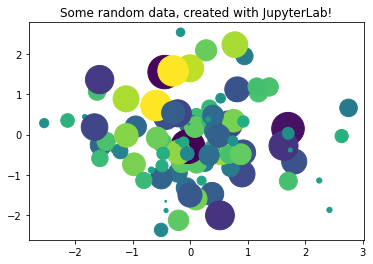

In [3]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from subprocess import check_output
import zipfile

Dataset = "endorsements-june-30"

# Will unzip the files so that you can see them..
with zipfile.ZipFile("../input/fivethirtyeight/data/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
d=pd.read_csv(Dataset+"/endorsements-june-30.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Análisis exploratorio

## Exploración inicial


In [5]:
d

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No


In [6]:
s = {}
for i in range(109):
    year = d['year'][i]
    points = int(d['percentage_endorsement_points'][i])
    if year not in s:
        s[year] = points
    else:
        s[year] += points
print(s)
print(sum(s.values()))

{1980: 98, 1984: 99, 1988: 194, 1992: 0, 1996: 97, 2000: 195, 2004: 94, 2008: 195, 2012: 99}
1071
